# 데이터 전처리

In [73]:
#라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [74]:
#시각화 도구 Setting
plt.rc('font', family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [75]:
raw = pd.read_csv("Dataset/final/funda_train.csv") #상점 신용카드 매출 예측 경진대회

In [76]:
raw.head() #데이터 구조 확인

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [77]:
#결측치 확인
raw.isnull().sum()

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [78]:
#결측치 처리
raw["region"] = raw["region"].fillna("기타 기타")
raw["type_of_business"] = raw["type_of_business"].fillna("기타")

In [79]:
#지역 데이터 전처리
raw["city"] = raw["region"].str.split(' ').str[0]
raw["gu"] = raw["region"].str.split(' ').str[1]

In [80]:
#날짜형 데이터 전처리
raw['transacted_date'] = pd.to_datetime(raw['transacted_date'])

raw["year"] = raw['transacted_date'].dt.year
raw["month"] = raw['transacted_date'].dt.month
raw["day"] = raw['transacted_date'].dt.day
raw["hour"] = raw["transacted_time"].str.split(":").str[0]
raw['weekday'] = raw['transacted_date'].dt.weekday
raw['day_name'] = raw['transacted_date'].dt.day_name()
raw["year_month"] = raw['transacted_date'].dt.strftime('%Y-%m')

In [81]:
#매출 데이터 정수형으로 전처리
raw["cost"] = (round(raw["amount"])).astype(int, -1)

In [82]:
raw.head() #전처리데이터 확인

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,city,gu,year,month,day,hour,weekday,day_name,year_month,cost
0,0,0,b,2016-06-01,13:13,0,기타 기타,기타 미용업,1857.142857,기타,기타,2016,6,1,13,2,Wednesday,2016-06,1857
1,0,1,h,2016-06-01,18:12,0,기타 기타,기타 미용업,857.142857,기타,기타,2016,6,1,18,2,Wednesday,2016-06,857
2,0,2,c,2016-06-01,18:52,0,기타 기타,기타 미용업,2000.000000,기타,기타,2016,6,1,18,2,Wednesday,2016-06,2000
3,0,3,a,2016-06-01,20:22,0,기타 기타,기타 미용업,7857.142857,기타,기타,2016,6,1,20,2,Wednesday,2016-06,7857
4,0,4,c,2016-06-02,11:06,0,기타 기타,기타 미용업,2000.000000,기타,기타,2016,6,2,11,3,Thursday,2016-06,2000


In [84]:
# 카드사별 DataFrame 생성
raw_a = raw[raw["card_company"] == "a"]
raw_b = raw[raw["card_company"] == "b"]
raw_c = raw[raw["card_company"] == "c"]
raw_d = raw[raw["card_company"] == "d"]
raw_e = raw[raw["card_company"] == "e"]
raw_f = raw[raw["card_company"] == "f"]
raw_g = raw[raw["card_company"] == "g"]
raw_h = raw[raw["card_company"] == "h"]

# 1차 분석 -카드사별 주력업종 탐색

In [85]:
#매출 top10 업종 확인
amount_top10 = raw.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).reset_index().head(11)["type_of_business"].to_list()

In [86]:
#업종별 매출 Top 10 제외
raw_a_2 = raw_a[~raw_a["type_of_business"].isin(amount_top10)]
raw_b_2 = raw_b[~raw_b["type_of_business"].isin(amount_top10)]
raw_c_2 = raw_c[~raw_c["type_of_business"].isin(amount_top10)]
raw_d_2 = raw_d[~raw_d["type_of_business"].isin(amount_top10)]
raw_e_2 = raw_e[~raw_e["type_of_business"].isin(amount_top10)]
raw_f_2 = raw_f[~raw_f["type_of_business"].isin(amount_top10)]
raw_g_2 = raw_g[~raw_g["type_of_business"].isin(amount_top10)]
raw_h_2 = raw_h[~raw_h["type_of_business"].isin(amount_top10)]

In [87]:
#카드사별로 Top 10 업종만 새로운 DataFrame 생성
top10_a = raw_a_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_b = raw_b_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_c = raw_c_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_d = raw_d_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_e = raw_e_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_f = raw_f_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_g = raw_g_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_h = raw_h_2.groupby(["type_of_business"])["amount"].sum().sort_values(ascending=False).head(10).reset_index()
top10_a["card_company"] = "a"
top10_b["card_company"] = "b"
top10_c["card_company"] = "c"
top10_d["card_company"] = "d"
top10_e["card_company"] = "e"
top10_f["card_company"] = "f"
top10_g["card_company"] = "g"
top10_h["card_company"] = "h"

In [88]:
#카드사별 업종별 매출 취합
top10_business_by_card = pd.concat([top10_a,top10_b,top10_c,top10_d,top10_e,top10_f,top10_g,top10_h])

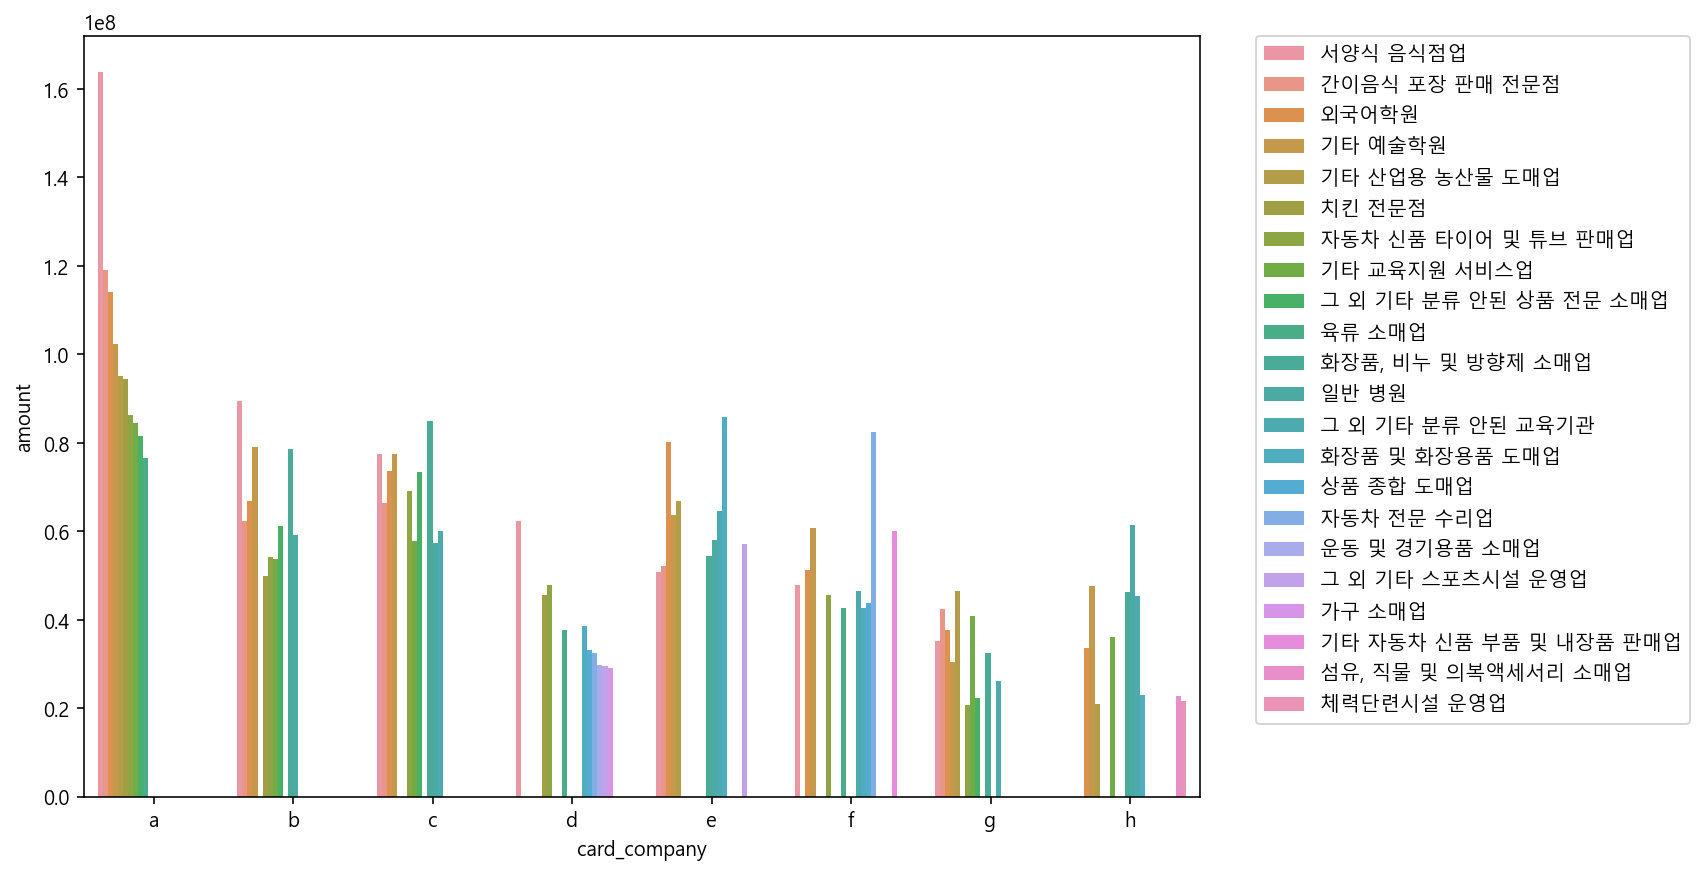

In [89]:
#카드사별 업종별 매출시각화 
plt.figure(figsize=(10, 7))
sns.barplot(data=top10_business_by_card, x="card_company", y="amount", hue="type_of_business")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

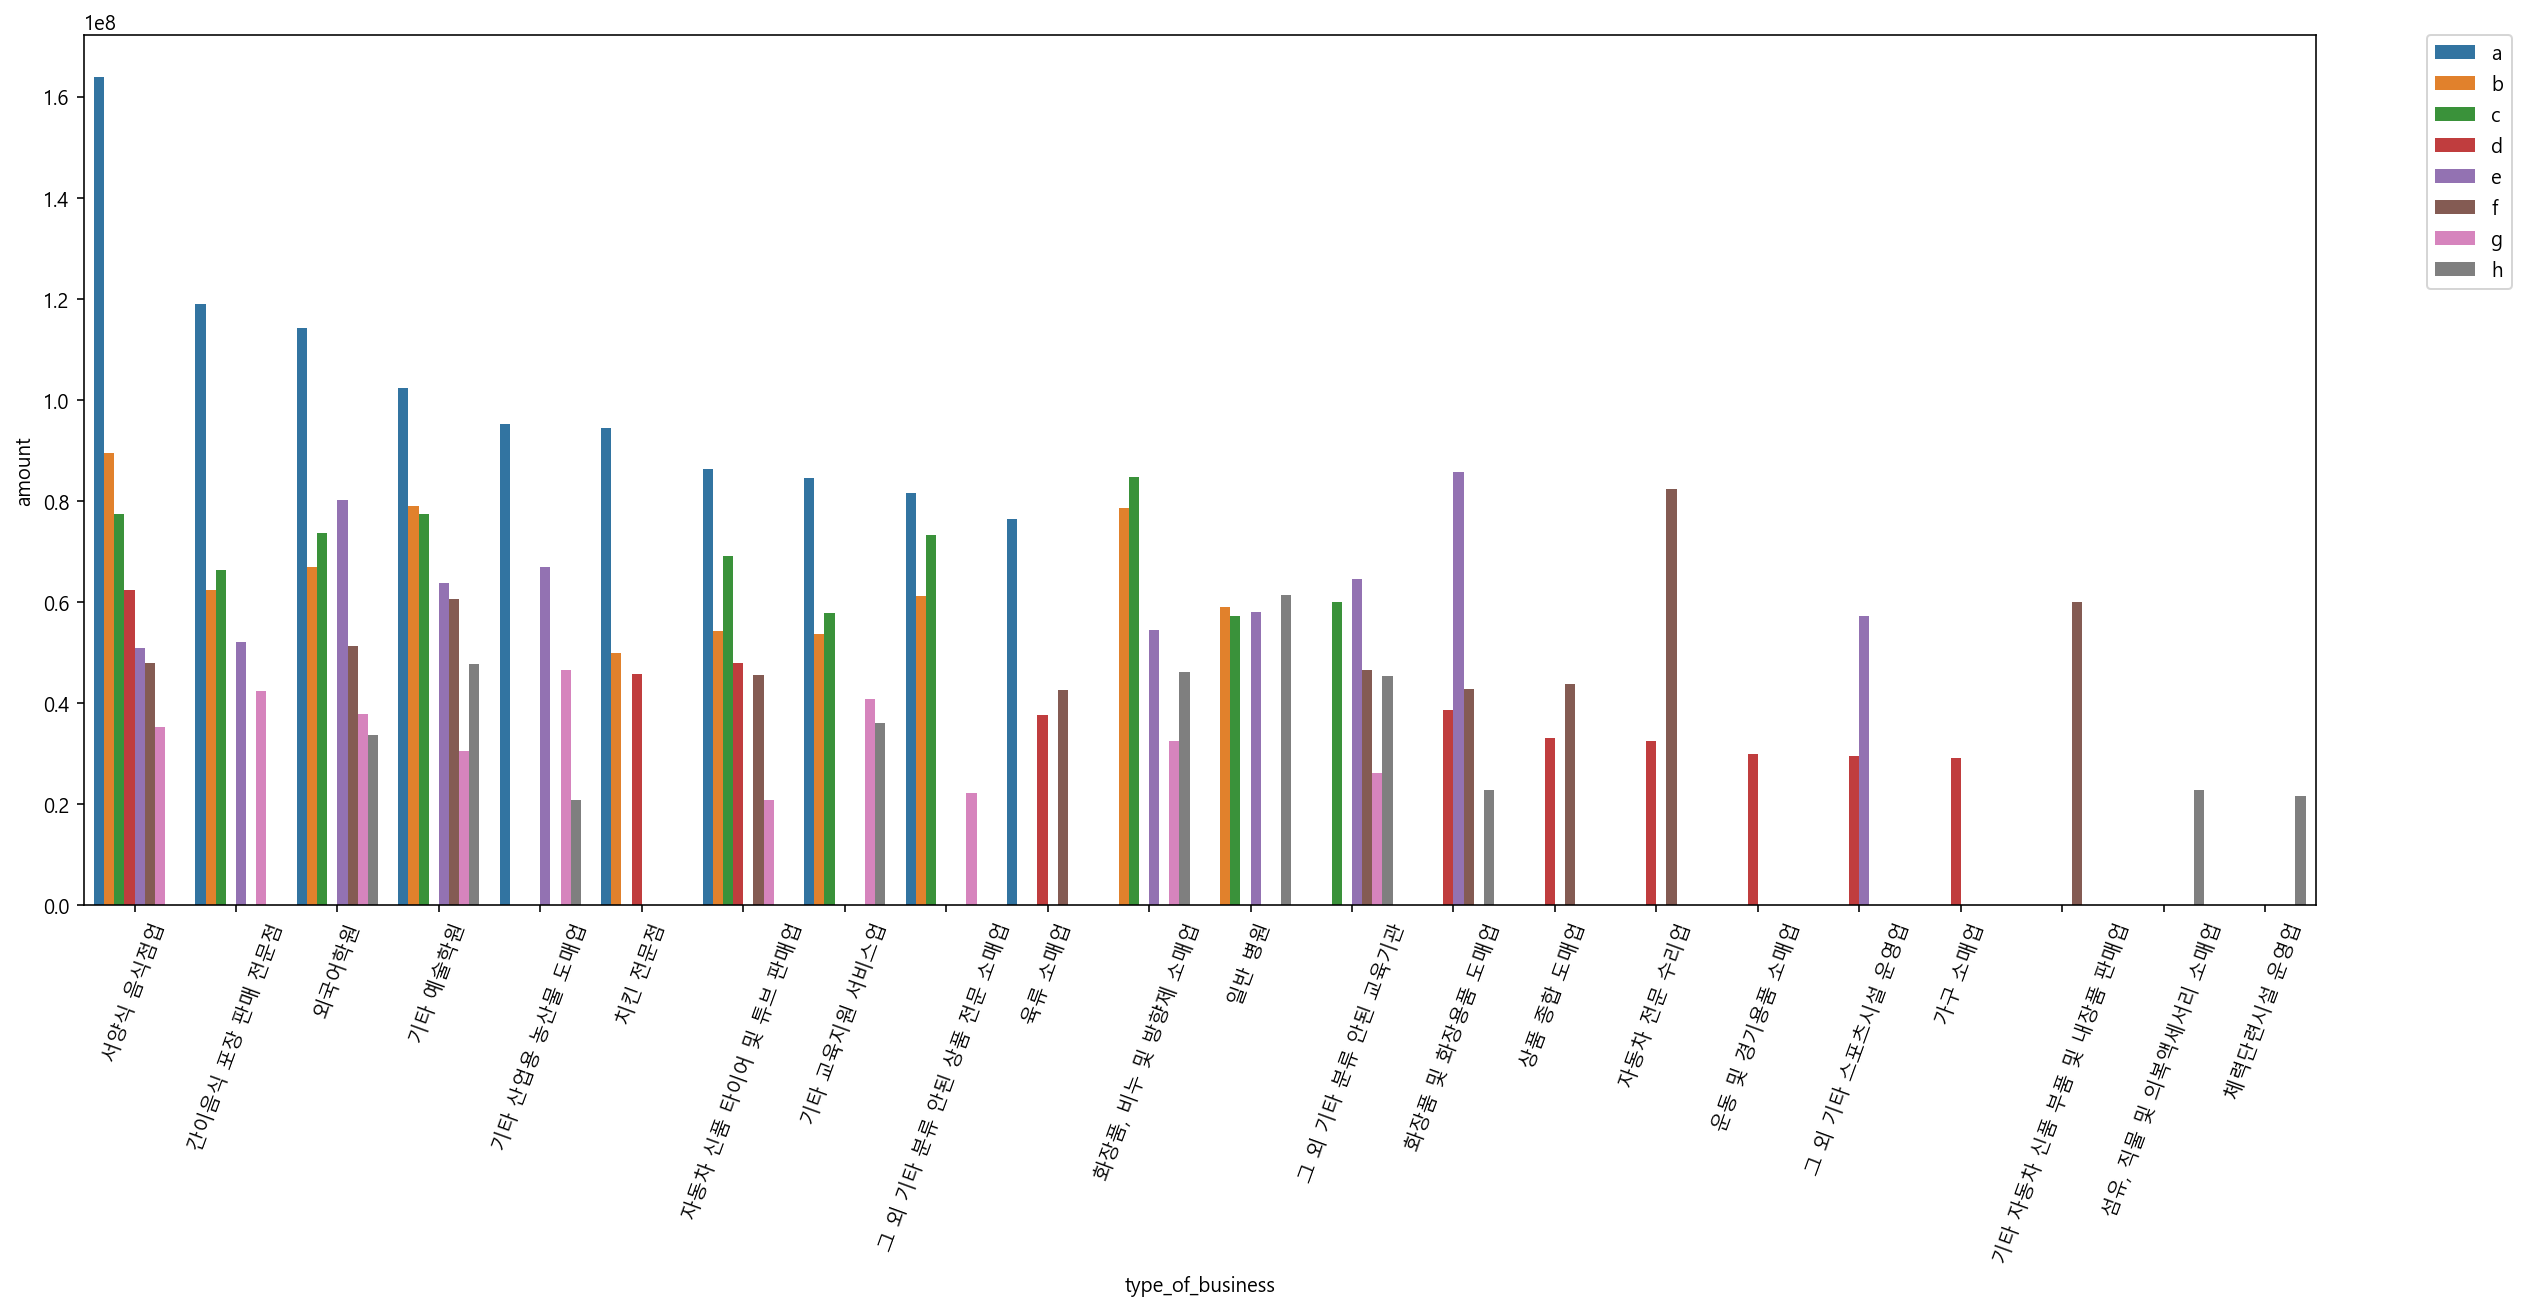

In [90]:
#업종을 x축으로 시각화
plt.figure(figsize=(20, 8))
plt.xticks(rotation = 70 )
sns.barplot(data=top10_business_by_card, x="type_of_business", y="amount", hue="card_company")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Top 10 업종 클러스터링

- 음식점 : '서양식 음식점업', '간이음식 포장 판매 전문점', '치킨 전문점', 
- 교육 : '외국어학원', '기타 예술학원', '기타 교육지원 서비스업', '그 외 기타 분류 안된 교육기관'
- 자동차 : '자동차 신품 타이어 및 튜브 판매업', '기타 자동차 신품 부품 및 내장품 판매업', '자동차 전문 수리업'
- 식품 : '기타 산업용 농산물 도매업', '육류 소매업'
- 의료 : '일반 병원', 
- 패션/미용 : '섬유, 직물 및 의복액세서리 소매업', '화장품, 비누 및 방향제 소매업', '화장품 및 화장용품 도매업'
- 건강 : '운동 및 경기용품 소매업', '그 외 기타 스포츠시설 운영업', '체력단련시설 운영업'
- 기타 : '그 외 기타 분류 안된 상품 전문 소매업',  '가구 소매업', '상품 종합 도매업'

In [91]:
#업종별 카테고리 생성

result = []
for a in top10_business_by_card["type_of_business"]:
    if a in ['서양식 음식점업', '간이음식 포장 판매 전문점', '치킨 전문점']:
        a = "음식점"
    elif a in ['외국어학원', '기타 예술학원', '기타 교육지원 서비스업', '그 외 기타 분류 안된 교육기관']:
        a = "교육"
    elif a in ['자동차 신품 타이어 및 튜브 판매업', '기타 자동차 신품 부품 및 내장품 판매업', '자동차 전문 수리업']:
        a = "자동차"
    elif a in ['기타 산업용 농산물 도매업', '육류 소매업']:
        a = "식품"
    elif a in ['일반 병원']:
        a = "의료"
    elif a in ['섬유, 직물 및 의복액세서리 소매업', '화장품, 비누 및 방향제 소매업', '화장품 및 화장용품 도매업']:
        a = "패션/미용"
    elif a in ['운동 및 경기용품 소매업', '그 외 기타 스포츠시설 운영업', '체력단련시설 운영업']:
        a = "건강"
    else :
        a = "기타"
    result.append(a)

top10_business_by_card["category"] = result

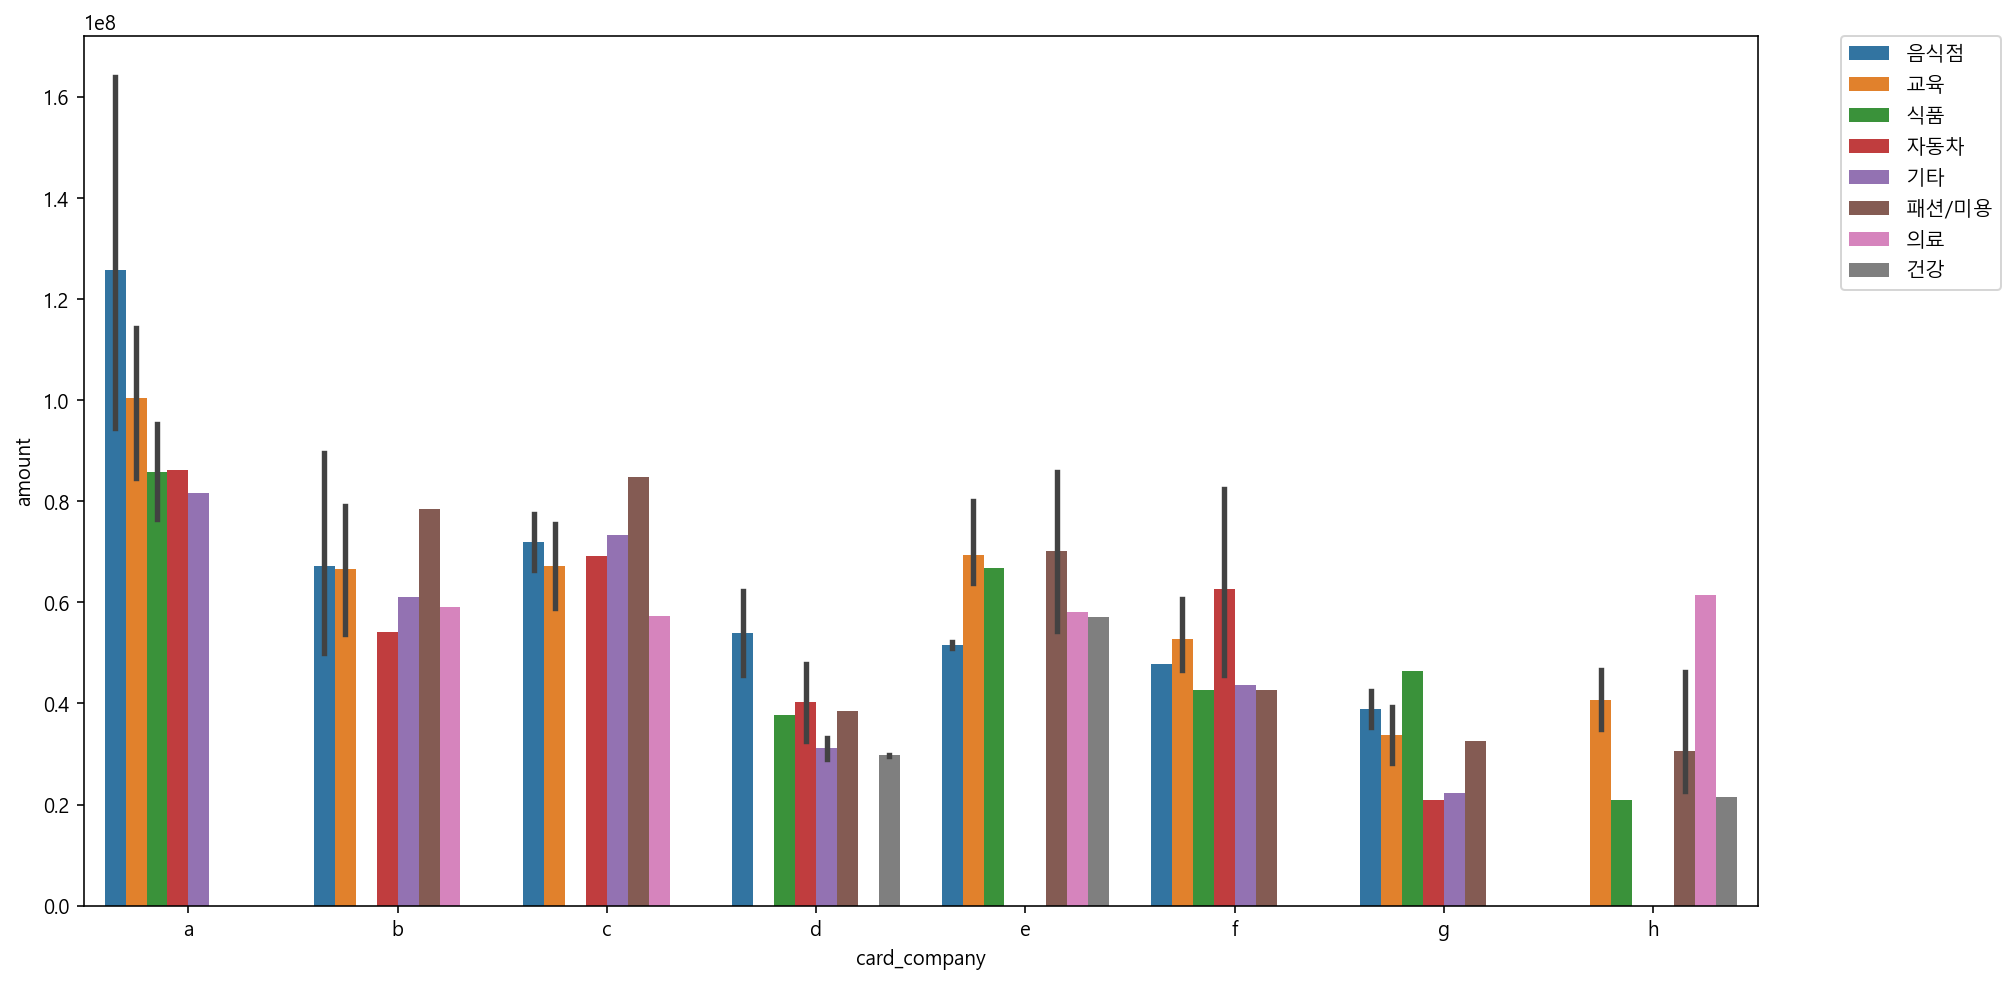

In [92]:
#카드사별 매출 Top10업종 카테고리 시각화

plt.figure(figsize=(15, 8))
sns.barplot(data=top10_business_by_card, x="card_company", y="amount", hue="category")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#####  카드사별 주력 업종
- A카드사 : 음식점, 교육
- B카드사 : 패션/미용
- C카드사 : 패션/미용
- D카드사 : 음식점
- E카드사 : 패션/미용, 교육
- F카드사 : 자동차
- G카드사 : 식료품
- H카드사 : 의료

# 2차 분석 -카드사별 주력업종 탐색
 - 업종 클러스터링을 통한 카드사별 주력 업종 카테고리 비교   

In [93]:
# 전체 업종 클러스터링 및 카테고리 분류
category = pd.read_excel("Dataset/category 분류_FW_v2.xlsx")
category = category[["type_of_business","category"]]

In [94]:
category.head()

,type_of_business,category
0,한식 음식점업,식음료
1,간이음식 포장 판매 전문점,식음료
2,서양식 음식점업,식음료
3,기타 주점업,식음료
4,기타 외국식 음식점업,식음료


In [95]:
# raw data와 merge
raw = pd.merge(raw, category, how ='left', on='type_of_business')

In [96]:
raw.head() #데이터 확인

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,city,gu,year,month,day,hour,weekday,day_name,year_month,cost,category
0,0,0,b,2016-06-01,13:13,0,기타 기타,기타 미용업,1857.142857,기타,기타,2016,6,1,13,2,Wednesday,2016-06,1857,미용
1,0,1,h,2016-06-01,18:12,0,기타 기타,기타 미용업,857.142857,기타,기타,2016,6,1,18,2,Wednesday,2016-06,857,미용
2,0,2,c,2016-06-01,18:52,0,기타 기타,기타 미용업,2000.000000,기타,기타,2016,6,1,18,2,Wednesday,2016-06,2000,미용
3,0,3,a,2016-06-01,20:22,0,기타 기타,기타 미용업,7857.142857,기타,기타,2016,6,1,20,2,Wednesday,2016-06,7857,미용
4,0,4,c,2016-06-02,11:06,0,기타 기타,기타 미용업,2000.000000,기타,기타,2016,6,2,11,3,Thursday,2016-06,2000,미용


In [97]:
#업종 매출 기준 전체 Top10 & 도매업 제외
amount_top10 = raw.groupby(["type_of_business"])["cost"].sum().sort_values(ascending=False).reset_index().head(11)["type_of_business"].to_list()
df = raw[(~raw["type_of_business"].isin(amount_top10))&(raw["category"]!="도매업")]
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,city,gu,year,month,day,hour,weekday,day_name,year_month,cost,category
0,0,0,b,2016-06-01,13:13,0,기타 기타,기타 미용업,1857.142857,기타,기타,2016,6,1,13,2,Wednesday,2016-06,1857,미용
1,0,1,h,2016-06-01,18:12,0,기타 기타,기타 미용업,857.142857,기타,기타,2016,6,1,18,2,Wednesday,2016-06,857,미용
2,0,2,c,2016-06-01,18:52,0,기타 기타,기타 미용업,2000.000000,기타,기타,2016,6,1,18,2,Wednesday,2016-06,2000,미용
3,0,3,a,2016-06-01,20:22,0,기타 기타,기타 미용업,7857.142857,기타,기타,2016,6,1,20,2,Wednesday,2016-06,7857,미용
4,0,4,c,2016-06-02,11:06,0,기타 기타,기타 미용업,2000.000000,기타,기타,2016,6,2,11,3,Thursday,2016-06,2000,미용


In [98]:
#카드사별 카레고리별 매출 DataFrame 생성
df_category = df.groupby(["card_company","category"])["cost"].sum().sort_values(ascending=False).reset_index()

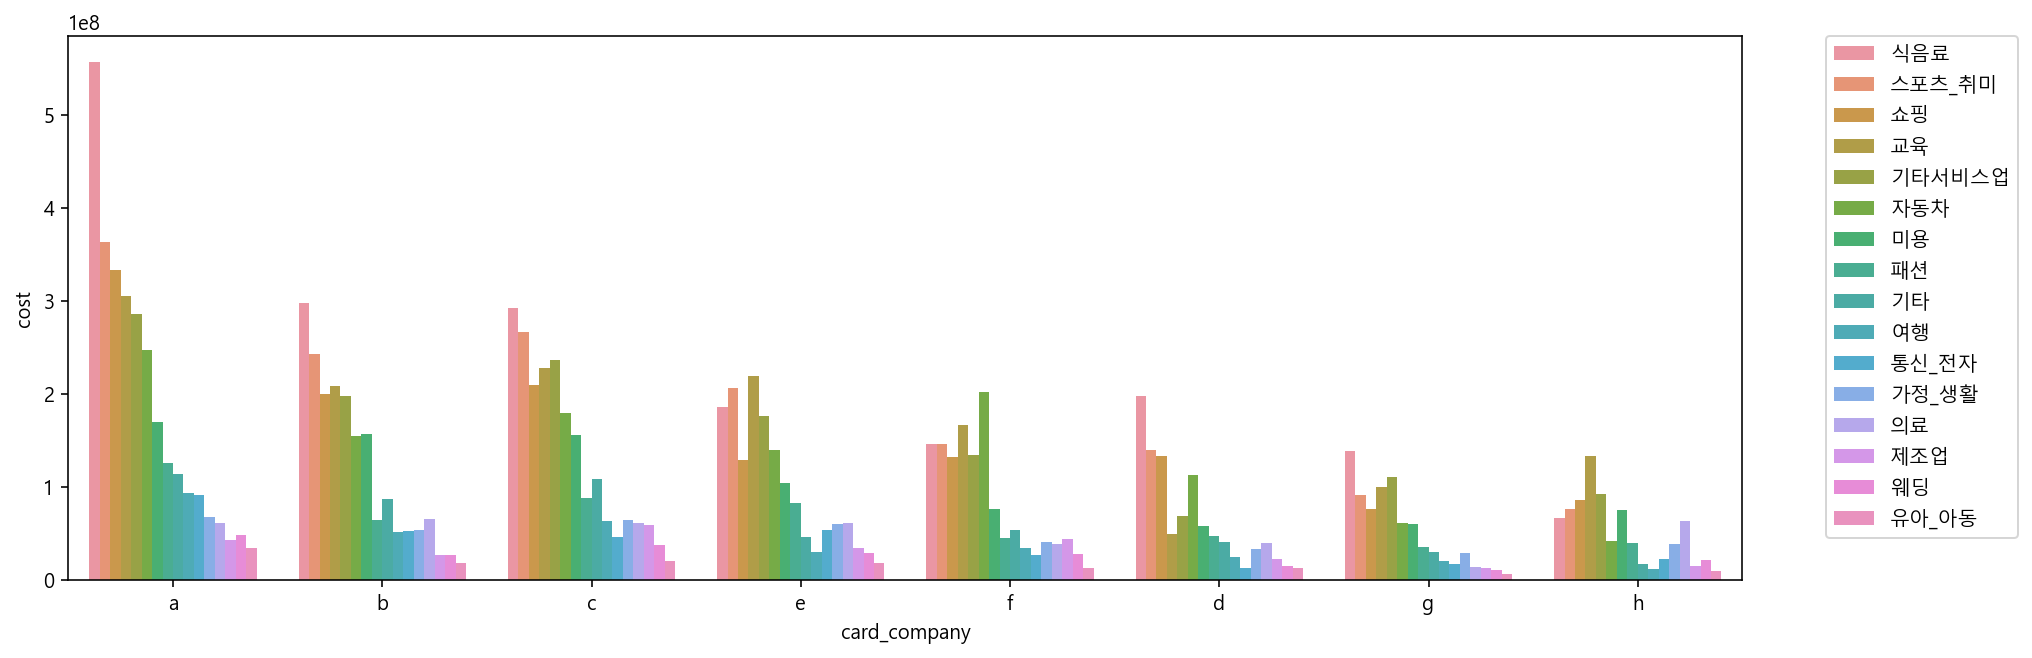

In [99]:
#카드사별 카레고리별 매출 시각화

plt.figure(figsize=(15, 5))
sns.barplot(data = df_category, x="card_company", y="cost", hue="category")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### 타 카드사 대비 업종 카테고리별 특이점
- A : 식음료 > 식음료가 압도적
- B,C : 식음료, 스포츠_취미 > A대비 스포츠_취미의 비중도 높음
- D : 식음료 > 업종별 특이성이 없어 지역별 데이터 보기
- E : 교육
- F : 자동차
- G : 식음료, 기타서비스업 > 식음료와 기타서비스업 소분류 확인
- H : 교육, 의료, 기타서비스, 미용 > 타카드사대비 해당카테고리가 높은 비중을 차지함


##### 각 카테고리별로 매출의 볼륨이 다르기 때문에 16개 모든 카테고리에 대한 카드사별 비교가 어려움
##### 주력 업종 카테고리의 중복이 발생

# 3차 분석 -카드사별 주력업종 탐색
 - 매출 이외에 거래건수, 일평균매출, 일매출중위값을 평가기준에 추가

In [100]:
# 카드사별 DataFrame 재생성
raw_a = raw[raw["card_company"] == "a"]
raw_b = raw[raw["card_company"] == "b"]
raw_c = raw[raw["card_company"] == "c"]
raw_d = raw[raw["card_company"] == "d"]
raw_e = raw[raw["card_company"] == "e"]
raw_f = raw[raw["card_company"] == "f"]
raw_g = raw[raw["card_company"] == "g"]
raw_h = raw[raw["card_company"] == "h"]

In [101]:
#매출 상관관계 파악을 위한 DataFrame생성
df_cost = raw.groupby(["transacted_date"])["cost"].sum().reset_index()
df_trans= raw.groupby(["transacted_date"])["card_id"].count().reset_index().rename(columns={'card_id': 'trans'})
df_mean = raw.groupby(["transacted_date"])["cost"].mean().reset_index().rename(columns={'cost': 'mean'})
df_median = raw.groupby(["transacted_date"])["cost"].median().reset_index().rename(columns={'cost': 'meidan'})
df_corr = pd.merge(df_cost,df_trans,on="transacted_date", how="outer")
df_corr = pd.merge(df_corr,df_mean,on="transacted_date", how="outer")
df_corr = pd.merge(df_corr,df_median,on="transacted_date", how="outer")

In [102]:
# 상관계수 구하기
df_corr.corr()

,cost,trans,mean,meidan
cost,1.000000,0.757364,0.556976,0.023496
trans,0.757364,1.000000,-0.102802,-0.330998
mean,0.556976,-0.102802,1.000000,0.479861
meidan,0.023496,-0.330998,0.479861,1.000000


- 거래건수 > 평균매출 > 중위값 순으로 매출과 높은 상관관계를 보임

In [103]:
#매출 Score 도출
cost_a = raw_a.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_a["rank"] = cost_a.index
cost_a["card_company"] = "a"

cost_b = raw_b.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_b["rank"] = cost_b.index
cost_b["card_company"] = "b"

cost_c = raw_c.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_c["rank"] = cost_c.index
cost_c["card_company"] = "c"

cost_d = raw_d.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_d["rank"] = cost_d.index
cost_d["card_company"] = "d"

cost_e = raw_e.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_e["rank"] = cost_e.index
cost_e["card_company"] = "e"

cost_f = raw_f.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_f["rank"] = cost_f.index
cost_f["card_company"] = "f"

cost_g = raw_g.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_g["rank"] = cost_g.index
cost_g["card_company"] = "g"

cost_h = raw_h.groupby(["category"])["cost"].sum().sort_values(ascending=False).reset_index()
cost_h["rank"] = cost_h.index
cost_h["card_company"] = "h"

df_cost = pd.concat([cost_a,cost_b,cost_c,cost_d,cost_e,cost_f,cost_g,cost_h])
df_cost = df_cost[df_cost["category"] != "기타"]
df_cost["cost_score"] = (17 - df_cost["rank"])*4
df_cost

,category,cost,rank,card_company,cost_score
1,식음료,2.520099e+09,1,a,64
2,도매업,9.242834e+08,2,a,60
3,패션,8.712913e+08,3,a,56
4,교육,8.200766e+08,4,a,52
5,미용,4.160822e+08,5,a,48
...,...,...,...,...,...
12,통신_전자,2.176324e+07,12,h,20
13,웨딩,2.089039e+07,13,h,16
14,제조업,1.441390e+07,14,h,12
15,여행,1.130558e+07,15,h,8


In [104]:
#거래건수 Score 도출
trans_a = raw_a.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_a["rank"] = trans_a.index
trans_a["card_company"] = "a"

trans_b = raw_b.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_b["rank"] = trans_b.index
trans_b["card_company"] = "b"

trans_c = raw_c.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_c["rank"] = trans_c.index
trans_c["card_company"] = "c"

trans_d = raw_d.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_d["rank"] = trans_d.index
trans_d["card_company"] = "d"

trans_e = raw_e.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_e["rank"] = trans_e.index
trans_e["card_company"] = "e"

trans_f = raw_f.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_f["rank"] = trans_f.index
trans_f["card_company"] = "f"

trans_g = raw_g.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_g["rank"] = trans_g.index
trans_g["card_company"] = "g"

trans_h = raw_h.groupby(["category"])["card_id"].count().sort_values(ascending=False).reset_index()
trans_h["rank"] =trans_h.index
trans_h["card_company"] = "h"

df_trans = pd.concat([trans_a,trans_b,trans_c,trans_d,trans_e,trans_f,trans_g,trans_h])
df_trans = df_trans[df_trans["category"] != "기타"]
df_trans["trans_score"] = (17 - df_trans["rank"])*3
df_trans

,category,card_id,rank,card_company,trans_score
1,식음료,409213,1,a,48
2,미용,61705,2,a,45
3,패션,58903,3,a,42
4,쇼핑,46294,4,a,39
5,스포츠_취미,31104,5,a,36
...,...,...,...,...,...
12,의료,709,12,h,15
13,가정_생활,678,13,h,12
14,여행,669,14,h,9
15,통신_전자,653,15,h,6


In [105]:
#매출평균 Score 도출
mean_a = raw_a.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_a["rank"] = mean_a.index
mean_a["card_company"] = "a"

mean_b = raw_b.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_b["rank"] = mean_b.index
mean_b["card_company"] = "b"

mean_c = raw_c.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_c["rank"] = mean_c.index
mean_c["card_company"] = "c"

mean_d = raw_d.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_d["rank"] = mean_d.index
mean_d["card_company"] = "d"

mean_e = raw_e.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_e["rank"] = mean_e.index
mean_e["card_company"] = "e"

mean_f = raw_f.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_f["rank"] = mean_f.index
mean_f["card_company"] = "f"

mean_g = raw_g.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_g["rank"] = mean_g.index
mean_g["card_company"] = "g"

mean_h = raw_h.groupby(["category"])["cost"].mean().sort_values(ascending=False).reset_index()
mean_h["rank"] = mean_h.index
mean_h["card_company"] = "h"

df_mean = pd.concat([mean_a,mean_b,mean_c,mean_d,mean_e,mean_f,mean_g,mean_h])
df_mean = df_mean[df_mean["category"] != "기타"]
df_mean["mean_score"] = (17 - df_mean["rank"])*2
df_mean

,category,cost,rank,card_company,mean_score
0,도매업,40448.270798,0,a,34
1,교육,35369.474295,1,a,32
2,의료,26726.652808,2,a,30
3,통신_전자,23379.662657,3,a,28
4,제조업,22804.814003,4,a,26
...,...,...,...,...,...
11,여행,16899.227205,11,h,12
13,미용,10922.870605,13,h,8
14,쇼핑,9036.876943,14,h,6
15,유아_아동,7658.508842,15,h,4


In [106]:
#매출중위값 Score 도출
median_a = raw_a.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_a["rank"] = median_a.index
median_a["card_company"] = "a"

median_b = raw_b.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_b["rank"] = median_b.index
median_b["card_company"] = "b"

median_c = raw_c.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_c["rank"] = median_c.index
median_c["card_company"] = "c"

median_d = raw_d.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_d["rank"] = median_d.index
median_d["card_company"] = "d"

median_e = raw_e.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_e["rank"] = median_e.index
median_e["card_company"] = "e"

median_f = raw_f.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_f["rank"] = median_f.index
median_f["card_company"] = "f"

median_g = raw_g.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_g["rank"] = median_g.index
median_g["card_company"] = "g"

median_h = raw_h.groupby(["category"])["cost"].median().sort_values(ascending=False).reset_index()
median_h["rank"] = median_h.index
median_h["card_company"] = "h"

df_median = pd.concat([median_a,median_b,median_c,median_d,median_e,median_f,median_g,median_h])
df_median = df_median[df_median["category"] != "기타"]
df_median["median_score"] = (17 - df_median["rank"])*1
df_median

,category,cost,rank,card_company,median_score
0,교육,25714.0,0,a,17
1,자동차,8571.0,1,a,16
2,여행,8571.0,2,a,15
3,패션,7857.0,3,a,14
4,도매업,6600.0,4,a,13
...,...,...,...,...,...
11,미용,5000.0,11,h,6
12,유아_아동,4857.0,12,h,5
14,통신_전자,3714.0,14,h,3
15,쇼핑,3714.0,15,h,2


In [107]:
# 카드사, 카테고리별 Total Score 도출
df_cost = df_cost[["category","card_company","cost_score"]]
df_trans = df_trans[["category","card_company","trans_score"]]
df_mean = df_mean[["category","card_company","mean_score"]]
df_median = df_median[["category","card_company","median_score"]]
df_merge = pd.merge(df_cost, df_trans, how='inner', on=['category','card_company'])
df_merge = pd.merge(df_merge, df_mean, how='inner', on=['category','card_company'])
df_merge = pd.merge(df_merge, df_median, how='inner', on=['category','card_company'])
df_merge["total_score"] = df_merge["cost_score"]+df_merge["trans_score"]+df_merge["mean_score"]+df_merge["median_score"]
df_merge

,category,card_company,cost_score,trans_score,mean_score,median_score,total_score
0,식음료,a,64,48,2,7,121
1,도매업,a,60,30,34,13,137
2,패션,a,56,42,16,14,128
3,교육,a,52,33,32,17,134
4,미용,a,48,45,4,2,99
...,...,...,...,...,...,...,...
123,통신_전자,h,20,6,26,3,55
124,웨딩,h,16,18,22,11,67
125,제조업,h,12,3,24,15,54
126,여행,h,8,9,12,12,41


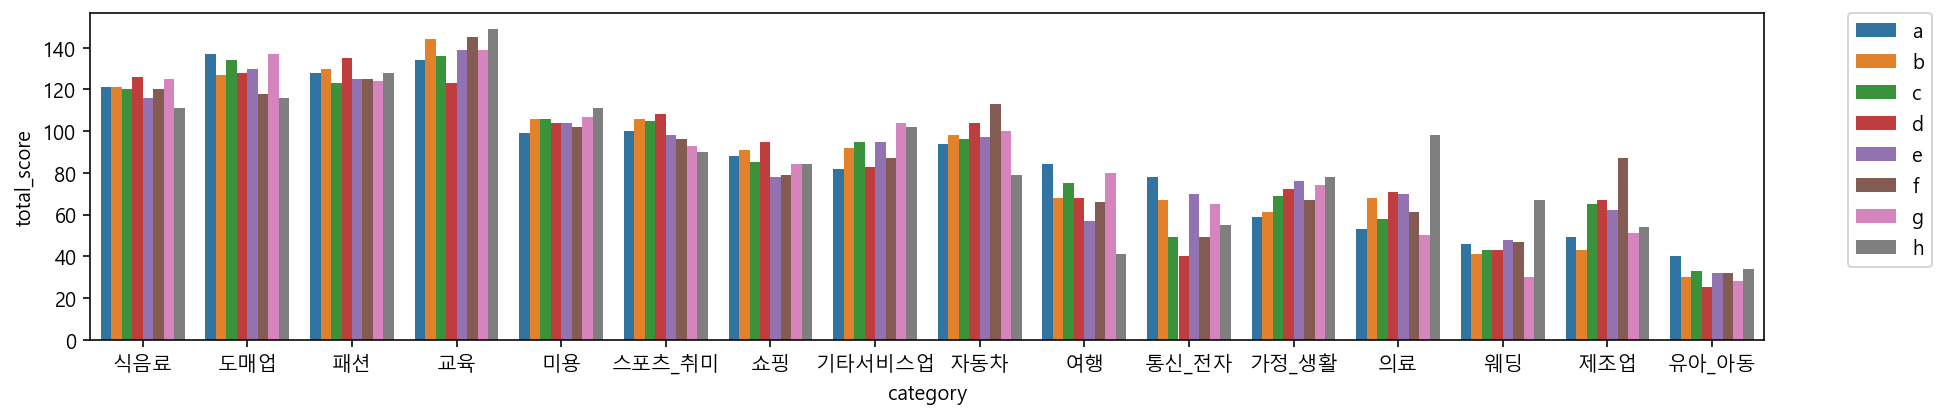

In [108]:
#카드사, 카테고리별 Total Score 시각화
plt.figure(figsize=(15, 3))
sns.barplot(data = df_merge, x="category", y="total_score", hue="card_company")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

스코어 기준

- 식음료 : d, g
- 도매업 : a, g
- 패션 : d,b
- 교육 : h,f
- 미용 : h,g
- 스포츠_취미 : d, b
- 쇼핑 : d, b
- 기타서비스 : g,h
- 자동차 : f,d
- 여행 : a,g
- 통신전자 : a,e
- 가정_생활 : h,e
- 의료 : h,d
- 웨딩 : h,e
- 제조업 : f,d
- 유아_아동 : a,c